In [1]:
import sys, os
sys.path.append(os.path.abspath(
    os.getcwd()+"/core")
)

In [2]:
import json
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

In [3]:
with open("data/non-ml-results.json", "r") as f:
    results = json.load(f)
print("Results loaded from results.json")

Results loaded from results.json


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


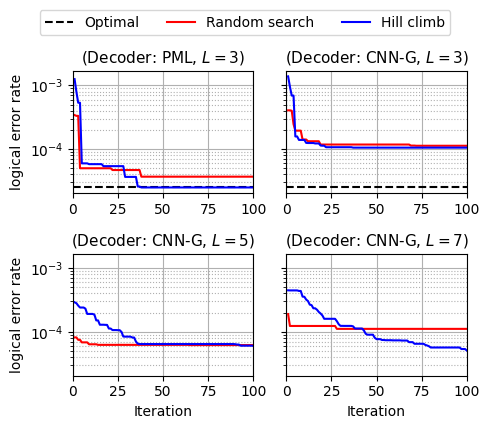

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(5, 4), sharey=True)

for idx, decoder, distance in [
    ([0,0], "PML", 3),
    ([0,1], "CNN-G", 3),
    ([1,0], "CNN-G", 5),
    ([1,1], "CNN-G", 7),
]:
    ax: Axes = axs[idx[0]][idx[1]]

    if distance == 3:
        ax.axhline(y=2.5E-5, color='k', linestyle='--', label='Optimal')
    
    ax.plot(
        range(1, len(results["LER Histories"]["Random"][decoder][str(distance)]) + 1),
        results["LER Histories"]["Random"][decoder][str(distance)],
        linestyle='-', color='r', label='Random search'
    )
    ax.plot(
        range(1, len(results["LER Histories"]["Hill Climb"][decoder][str(distance)]) + 1),
        results["LER Histories"]["Hill Climb"][decoder][str(distance)],
        linestyle='-', color='b', label='Hill climb'
    )

    ax.set_yscale('log')
    ax.set_title(f"(Decoder: {decoder}, $L={distance}$)", fontsize=11)
    if idx[0] == 1:
        ax.set_xlabel('Iteration')
    if idx[1] == 0:
        ax.set_ylabel('logical error rate')

    ax.grid(True, which="major", linestyle='-')
    ax.grid(True, which="minor", linestyle=':')

    ax.set_xlim(0, 100)

# Add a common legend below the subplots
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, .98))

fig.tight_layout()

plt.savefig("figs/hill_climb_vs_random.eps", dpi=300, bbox_inches='tight')
plt.savefig("figs/hill_climb_vs_random.pdf", dpi=300, bbox_inches='tight')
plt.savefig("figs/hill_climb_vs_random.png", dpi=300, bbox_inches='tight')

plt.show()